## Importing the libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [22]:
df=pd.read_csv('creditcard.csv')

## Exploring the data

In [37]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131208,79521.0,1.297916,-0.437366,0.371514,-1.154293,-0.504508,0.262963,-0.706333,0.201283,1.658298,...,-0.048795,0.078179,-0.212718,-0.982052,0.647089,-0.621146,0.087860,0.011508,1.00,0
42610,41170.0,-0.544578,-0.128066,2.051525,-1.656452,-1.214074,-0.770990,0.346983,-0.039535,1.288447,...,0.100474,0.385134,0.105162,0.769424,-0.051187,-0.103325,0.069151,0.079533,105.00,0
86757,61380.0,1.091687,-0.400956,0.425309,1.889075,1.307873,5.085615,-1.583694,1.383989,0.855096,...,-0.135047,-0.112857,-0.098376,1.038740,0.600509,0.138620,0.080226,0.032090,15.89,0
244014,152168.0,-1.982057,-1.871465,0.977700,-1.744761,0.623461,-0.269938,-0.373248,0.073800,-0.778119,...,-0.112191,0.474007,1.397225,0.324012,-0.204746,-0.427738,0.337261,-0.117738,50.00,0
72741,54837.0,1.208128,0.165372,-0.532229,1.335024,2.023462,3.959675,-0.798624,0.988859,-0.591381,...,0.091567,0.092349,-0.099050,1.004599,0.594737,0.111733,0.014436,0.024135,10.62,0


In [38]:
df.shape

(284807, 31)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [27]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

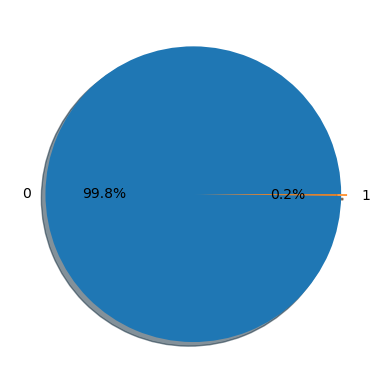

In [29]:
plt.pie(df['Class'].value_counts(),labels=df['Class'].value_counts().keys(),explode=[.01,.03],shadow=True,autopct='%1.1f%%')
plt.show()

<AxesSubplot:>

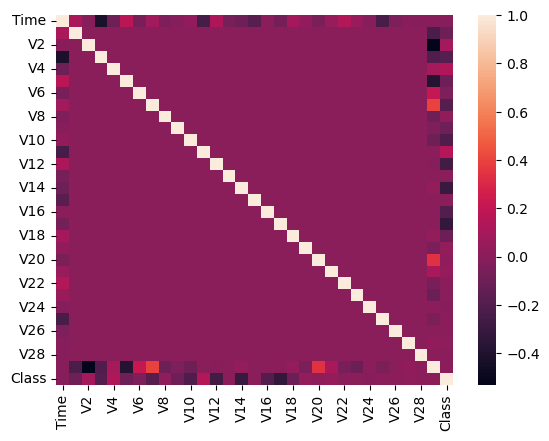

In [30]:
sns.heatmap(df.corr())

## the features and the target

In [31]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## splitting the dataset

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## training the model

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## predicted and tested dataset

In [34]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Validation for trained dataset

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.95 %
Standard Deviation: 0.01 %


## accuracy_score for tested dataset

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[71075     7]
 [   25    95]]


0.9995505744220669